In [2]:
import numpy as np
from casadi import *
from scipy.integrate import ode
import matplotlib.pyplot as plt

In [3]:
##------Simple Reaction Example-------------
#  A + B --> C
#  Rate is given by r = kc_Ac_B 
#  There is a feed of B into the reactor for a set period of time
# 

# initial concentration in reactor
cA_0 = 2 # mol/L
cB_0 = 0 # mol/L
cC_0 = 0 # mol/L
# Initial volume (L)
Vinit = 5

# B is fed to reactor over 1 hour at the rate of 1/12 L/min (5L over 60 min) 
# with concentration of 2 mol/L
qF = 1/12 # L/min
cB_F = 2 # mol/L
tfeed = 60* 60 # seconds

# Simulation time (sec)
tf = 5*3600

# rate constant
k = 5e-4 # L/mol.s



In [12]:
# Set up casadi model
cA = MX.sym('cA')
cB = MX.sym('cB')
cC = MX.sym('cC')
V = MX.sym('V')
t = MX.sym('t')

k = MX.sym('k')
cBin = MX.sym('cBin')

qin = interpolant('qin', 'linear', [np.array([0, tfeed, tfeed+60, tf])], np.array([qF / 60, qF / 60, 0, 0]))
qin_i = qin(t)

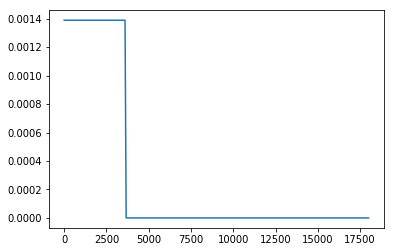

In [13]:
# plot interpolation function
x_t = np.arange(0, 5*3600)
y_qin = qin(x_t)
plt.plot(x_t, y_qin)
plt.show()

In [14]:
x = vertcat(cA, cB, cC, V, t)

p = vertcat(k, cBin)

In [15]:
r1 = k * cA * cB
dA = -qin_i/V * cA -r1
dB = qin_i/V * (cBin - cB) -r1
dC = -qin_i/V * cC + r1
dV = qin_i
dt = 1
f = vertcat(dA, dB, dC, dV, dt)

prob = {'x' : x, 'p' : p, 'ode' : f}

In [16]:
tinit = 0
tfinal = 5*3600
tgrid = np.linspace(tinit, tfinal, 60)
pin = np.array([5e-4, 2])
op = {'t0': tinit, 'tf' : tfinal, 'grid' : tgrid, 'output_t0' : True}
F = integrator('F', 'cvodes', prob, op)
x0 = [cA_0, cB_0, cC_0, Vinit, 0]
solcas = F(x0 = x0, p = pin)

In [23]:
solcas_x = solcas['xf'].full().T

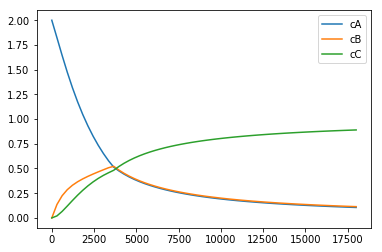

In [26]:
plt.plot(tgrid, solcas_x[:, 0], label = "cA")
plt.plot(tgrid, solcas_x[:, 1], label = "cB")
plt.plot(tgrid, solcas_x[:, 2], label = "cC")
plt.legend()
plt.show()